# Computing the Carbon Footprint of a Kaggle Competition

In [1]:
import pandas as pd
from IPython.display import display, HTML

# For displaying side-by-side dataframes
css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

In [2]:
PATH = "results/"

# Kaggle Competition: Team 2
## Pipeline1: Pretraining

In [3]:
# This is for 1 fold, out of 5
# This will be used to find OUR carbon footprint
pretrain_1_file = PATH+"siim_pretrain_results_1epoch.csv"
ptrain_1 = pd.read_csv(pretrain_1_file)

# This is for all 5 folds, the estimated cost of running the full code
pretrain_full_file = PATH+"siim_pretrain_results_full.csv"
ptrain_full = pd.read_csv(pretrain_full_file)

display(ptrain_1)
display(ptrain_full)

,training_file,time,energy(kWh),CO2eq(g),distance(km)
0,cait_pretraining,8:00:33,2.800010,299.601022,2.786986
1,f1_pretraining,11:55:04,4.303103,218.651446,2.033967
2,f3_pretraining,22:14:23,8.025735,229.189462,2.131995
3,l1_pretraining,11:25:01,2.749729,167.122448,1.554627
4,l1b_pretraining,11:06:12,2.648516,69.744261,0.648784
5,l2_pretraining,15:49:29,3.752667,113.056541,1.051689
6,n_cf2_pretraining,10:59:26,2.629704,71.061763,0.661040


,training_file,time,energy(kWh),CO2eq(g),distance(km)
0,cait_pretraining,40:02:47,14.000048,1126.210028,10.476372
1,f1_pretraining,59:35:21,21.515517,1024.948272,9.534403
2,f3_pretraining,111:11:54,40.128676,1194.298670,11.109755
3,l1_pretraining,57:05:03,13.748647,631.333879,5.872873
4,l1b_pretraining,55:31:01,13.242581,334.029285,3.107249
5,l2_pretraining,79:07:25,18.763335,516.337360,4.803138
6,n_cf2_pretraining,54:57:12,13.148518,431.759478,4.016367


## Pipeline1: Training

In [4]:
# This is for 1 fold, out of 5
# This will be used to find OUR carbon footprint
train_1_file = PATH+"siim_train_results_1epoch.csv"
train_1 = pd.read_csv(train_1_file)

# This is for all 5 folds, the estimated cost of running the full code
train_full_file = PATH+"siim_train_results_full.csv"
train_full = pd.read_csv(train_full_file)

display(train_1)
display(train_full)

,training_file,time,energy(kWh),CO2eq(g),distance(km)
0,n_cf11,1:38:42,0.194869,9.520723,0.088565
1,n_cf11_1,7:33:10,0.578794,25.746986,0.239507
2,n_cf11_9,1:24:16,0.189512,10.865354,0.101073
3,n_cf11_10,1:50:25,0.231844,8.607216,0.080067
4,n_cf11_6,1:59:30,0.530860,19.907256,0.185184
5,n_cf11_7,1:46:22,0.285051,11.972152,0.111369
6,n_cf11_rot1,0:52:31,0.170745,6.787123,0.063136


,training_file,time,energy(kWh),CO2eq(g),distance(km)
0,n_cf11,8:13:32,0.974343,42.493534,0.395289
1,n_cf11_1,37:45:51,2.893969,168.435306,1.566840
2,n_cf11_9,7:01:21,0.947560,50.139455,0.466414
3,n_cf11_10,9:12:03,1.159221,34.338704,0.319430
4,n_cf11_6,9:57:29,2.654301,107.277989,0.997935
5,n_cf11_7,8:51:50,1.425256,58.111582,0.540573
6,n_cf11_rot1,4:22:35,0.853726,33.062484,0.307558


## Calculate Our Carbon Footprint

In [5]:
def calc_footprint(ptrain_df, train_df, ptrain_runs=1, train_runs=1):
    """
    Function to make a dataframe containing the carbon footprint
    of each stage in the pretraining and training from pipeline 1.
    ------------------------------
    Parameters
    ptrain_df: the pretraining dataframe
    train_df: the training dataframe
    ptrain_runs: the number of times we ran pretraining
    train_runs: the number of times we ran training
    """
    # Compute Sums
    ptrain_co2sum = ptrain_df["CO2eq(g)"].sum() * ptrain_runs       # MULTIPLY BY NUMBER OF TIMES RAN
    ptrain_dist_sum = ptrain_df["distance(km)"].sum() * ptrain_runs # MULTIPLY BY NUMBER OF TIMES RAN

    train_co2sum = train_df["CO2eq(g)"].sum() * train_runs        # MULTIPLY BY NUMBER OF TIMES RAN
    train_dist_sum = train_df["distance(km)"].sum() * train_runs  # MULTIPLY BY NUMBER OF TIMES RAN

    # Make new rows
    row1 = pd.DataFrame({"stage":"ptrain", "CO2eq(g)":ptrain_co2sum, "distance(km)":ptrain_dist_sum}, index=[0])
    row2 = pd.DataFrame({"stage":"train", "CO2eq(g)":train_co2sum, "distance(km)":train_dist_sum}, index=[1])

    # Concatenate into one dataframe
    siim_fp = pd.concat([row1,row2])

    return siim_fp

In [6]:
# Carbon footprint of 1 epoch 
# NEED TO ADD IN THE CORRECT NUMBER OF TIMES WE RAN EACH STAGE
our_siim_totals = calc_footprint(ptrain_1, train_1, 1, 1)
our_siim_totals

,stage,CO2eq(g),distance(km)
0,ptrain,1168.426943,10.869088
1,train,93.406810,0.868901


## Maximum Training Cost: Based on Team 2's Pipeline1

In [7]:
# Carbon footprint of the full training
team2_siim_totals = calc_footprint(ptrain_full, train_full, 1, 1)
team2_siim_totals

,stage,CO2eq(g),distance(km)
0,ptrain,5258.916972,48.920157
1,train,493.859054,4.594039


In [8]:
max_train_cost_CO2 = round(team2_siim_totals['CO2eq(g)'].sum(), 2)
max_train_cost_dist = round(team2_siim_totals['distance(km)'].sum(),2)

print(f"Team 2's CO2 total usage (pipeline1): {max_train_cost_CO2}g")
print(f"Team 2's distance total (pipeline1): {max_train_cost_dist}km")

Team 2's CO2 total usage (pipeline1): 5752.78g
Team 2's distance total (pipeline1): 53.51km


# ============================================================

# RevisitingTransfer
The column "epochs" is the number of epochs ran during training the model weights layer,<br>
which is what the cost results are tracking.<br> 
The column "class_epochs" is the number of epochs during training the classification layer.<br>
We calculate the cost per single epoch then compute the estimated cost for all of the training (including training of the classification layer)

In [9]:
# Load results file with Base=ImageNet and Freeze=False
rt_frz_false_file = PATH+"rt_imagenet_frzfalse_results.csv"
rt_frz_false = pd.read_csv(rt_frz_false_file)

# Load results file with Base=ImageNet and Freeze=True
rt_frz_true_file = PATH+"rt_imagenet_frztrue_results.csv"
rt_frz_true = pd.read_csv(rt_frz_true_file)

# Add string to dataset name
rt_frz_false["dataset"] = rt_frz_false["dataset"].astype(str) + "_frz_false"
rt_frz_true["dataset"] = rt_frz_true["dataset"].astype(str) + "_frz_true"

# Combine datasets
revisit_transfer = pd.concat([rt_frz_false, rt_frz_true])

In [10]:
# Calculate total epochs ran
revisit_transfer["total_epochs"] = revisit_transfer["epochs"] + revisit_transfer["class_epochs"]

# Get CO2eq and distance per single epoch
revisit_transfer["CO2eq(g)/e"] = revisit_transfer["CO2eq(g)"] / revisit_transfer["epochs"]
revisit_transfer["distance(km)/e"] = revisit_transfer["distance(km)"] / revisit_transfer["epochs"]

# Get Total CO2eq and distance per model
revisit_transfer["total_CO2eq(g)"] = revisit_transfer["CO2eq(g)/e"] * revisit_transfer["total_epochs"]
revisit_transfer["total_distance(km)"] = revisit_transfer["distance(km)/e"] * revisit_transfer["total_epochs"]

# Round values
revisit_transfer[["total_CO2eq(g)","total_distance(km)"]] = revisit_transfer[["total_CO2eq(g)","total_distance(km)"]].round(3)

In [11]:
# Show just the total columns
revisit_transfer[["dataset","total_CO2eq(g)","total_distance(km)"]]

,dataset,total_CO2eq(g),total_distance(km)
0,isic_frz_false,120.219,1.118
1,breast_frz_false,12.572,0.117
2,chest_frz_false,36.428,0.339
3,knee_frz_false,18.384,0.171
4,thyroid_frz_false,1.749,0.016
0,isic_frz_true,7.601,0.071
1,breast_frz_true,5.054,0.047
2,chest_frz_true,13.117,0.122
3,knee_frz_true,4.784,0.045
4,thyroid_frz_true,1.583,0.015


## Minimum training cost

In [12]:
min_train_cost_CO2 = revisit_transfer['total_CO2eq(g)'].min()
min_train_cost_dist = revisit_transfer['total_distance(km)'].min()

print(f"The minimum carbon footprint of training a single model is {min_train_cost_CO2}g CO2 emissions")

The minimum carbon footprint of training a single model is 1.583g CO2 emissions


# ==========================================================

# Carbon Footprint of the Whole Competition

Total number of entries from Veronika's supplementary [information](https://static-content.springer.com/esm/art%3A10.1038%2Fs41746-022-00592-y/MediaObjects/41746_2022_592_MOESM1_ESM.pdf).

In [13]:
# Total entries
total_entries = 32307

# Total submissions, based on teams with more than 2 submissions
total_entries_more_than_2 = 31751

## Lower bound

In [14]:
# Lower bound = lowest model training cost * total entries (excluding teams who submitted 2 or less times)
lower_bound_CO2 = min_train_cost_CO2 * total_entries_more_than_2
lower_bound_dist = min_train_cost_dist * total_entries_more_than_2
print(f"CO2 lower bound: {lower_bound_CO2}g") 
print(f"Distance lower bound: {lower_bound_dist}km")

CO2 lower bound: 50261.833g
Distance lower bound: 476.265km


## Upper bound

In [15]:
# Upper bound = highest model training cost * total entries (excluding teams who submitted 2 or less times)
upper_bound_CO2 = max_train_cost_CO2 * total_entries_more_than_2
upper_bound_dist = max_train_cost_dist * total_entries_more_than_2

print(f"CO2 lower bound: {upper_bound_CO2}g") 
print(f"Distance lower bound: {upper_bound_dist}km")

CO2 lower bound: 182656517.78g
Distance lower bound: 1698996.01km


# ==========================================================

# Display dataframes

In [16]:
display(revisit_transfer[["dataset","total_CO2eq(g)"]])
display(pd.concat([ptrain_full, train_full])[["training_file","CO2eq(g)"]])

,dataset,total_CO2eq(g)
0,isic_frz_false,120.219
1,breast_frz_false,12.572
2,chest_frz_false,36.428
3,knee_frz_false,18.384
4,thyroid_frz_false,1.749
0,isic_frz_true,7.601
1,breast_frz_true,5.054
2,chest_frz_true,13.117
3,knee_frz_true,4.784
4,thyroid_frz_true,1.583


,training_file,CO2eq(g)
0,cait_pretraining,1126.210028
1,f1_pretraining,1024.948272
2,f3_pretraining,1194.298670
3,l1_pretraining,631.333879
4,l1b_pretraining,334.029285
5,l2_pretraining,516.337360
6,n_cf2_pretraining,431.759478
0,n_cf11,42.493534
1,n_cf11_1,168.435306
2,n_cf11_9,50.139455


In [100]:
import matplotlib.pyplot as plt
labels = ["Lower Bound", "Upper Bound", 
          "Air Travel, 1 Person NY<->SF", "Human Life, Avg 1 Year",
          "American Life, Avg 1 Year", "Car, Avg Incl. Fuel, 1 Lifetime", "11 Minute Space Flight, 1 Person"]
values = [0.05, 182.66, 0.90, 5.00, 16.40, 57.15, 75.00]
df = pd.DataFrame(values, labels, columns=["co2"])
#df["co2"] = df["co2"].round(2)
df = df.sort_values("co2",ascending=False)
df

,co2
Upper Bound,182.66
"11 Minute Space Flight, 1 Person",75.00
"Car, Avg Incl. Fuel, 1 Lifetime",57.15
"American Life, Avg 1 Year",16.40
"Human Life, Avg 1 Year",5.00
"Air Travel, 1 Person NY<->SF",0.90
Lower Bound,0.05


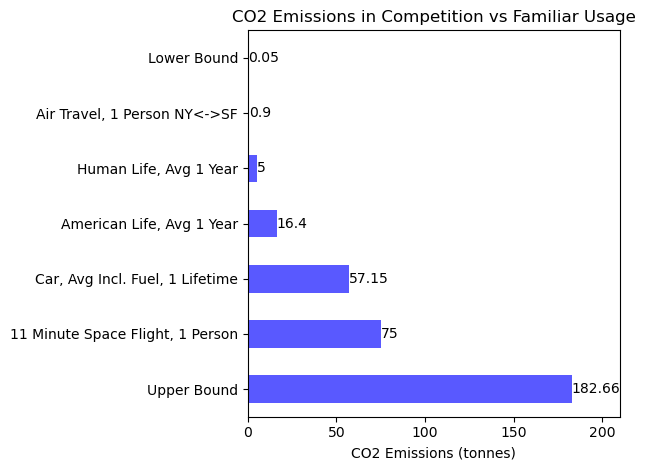

In [103]:
fig, ax = plt.subplots()
df.plot.barh(legend=False, xlabel="CO2 Emissions (tonnes)",#grid=True, 
             title="CO2 Emissions in Competition vs Familiar Usage",
             color="blue", alpha=0.65, ax=ax )

ax.set_xlim(0,210)
ax.bar_label(ax.containers[0]);
fig.tight_layout()

plt.savefig("img/CO2_comparison.png")

# ==========================================================
# Average Cost to Train a Single Model

We are moving away from this metric, as the average does not make sense. There are reasons it could be an overestimation (some entries are possibly very simple, with training a single model) as well as an underestimation (we did not measure all of Team 2's ensemble, and many of the winners have similar ensembles). Therefore we are transitioning to a lower an upper bound estimation. See below.

In [17]:
# models trained in RT with freeze=False + models trained in RT with freeze=False + the single Kaggle project
total_models_trained = len(rt_frz_false) + len(rt_frz_true) + 1

In [18]:
# CO2 cost
CO2_cost_per_model = (revisit_transfer["total_CO2eq(g)"].sum() + team2_siim_totals["CO2eq(g)"].sum()) / total_models_trained
CO2_whole_comp_cost = total_entries * CO2_cost_per_model

print(f"The average cost of training a single model is {round(CO2_cost_per_model,2)}g CO2eq")
print(f"The estimated carbon footprint of the whole competition is {round(CO2_whole_comp_cost,2)}g CO2eq")
print(f"Which is equivalent to {round(275787.835915,2)}lbs of CO2")

The average cost of training a single model is 543.12g CO2eq
The estimated carbon footprint of the whole competition is 17546422.26g CO2eq
Which is equivalent to 275787.84lbs of CO2


In [19]:
# distance cost
dist_cost_per_model = (revisit_transfer["total_distance(km)"].sum() + team2_siim_totals["distance(km)"].sum()) / total_models_trained
dist_whole_comp_cost = total_entries * dist_cost_per_model

print(f"The average distance cost of training a single model is {round(dist_cost_per_model,2)}km")
print(f"The estimated carbon footprint of the whole competition in distance driven {round(dist_whole_comp_cost,2)} km")

The average distance cost of training a single model is 5.05km
The estimated carbon footprint of the whole competition in distance driven 163224.35 km
